# Working with Vision

## Univeral Code Used for the Entire Notebook

Let's set up our libraries and client

In [15]:
# Get the libraries we need for the notebook
import base64  # For encoding and decoding binary data to/from ASCII
import io  # For handling byte streams
import os  # For interacting with the operating system
import requests  # For making HTTP requests
from PIL import Image as PILImage  # For image processing
from IPython.display import display, Image, Markdown, clear_output  # For displaying content in Jupyter Notebooks
from openai import OpenAI, AssistantEventHandler  # For OpenAI API and event handling
from typing_extensions import override  # For method overriding in subclasses


In [16]:
# Create an instance of the OpenAI client
client = OpenAI()

## Vision with Chat Completions

### Passing in URLs

In [17]:
# URL of the image to be analyzed
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"

# Making a request to the OpenAI API to analyze the image
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "What’s in this image?"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": image_url,
                    },
                },
            ],
        }
    ],
    
)

# Printing the response from the OpenAI API
print(response.choices[0].message.content)

# Displaying the image in the notebook
display(Image(url=image_url))


The image features a serene landscape with a wooden boardwalk running through a lush green field. The scene includes tall grasses on either side of the path, and there are trees and bushes in the background, under a sky filled with soft clouds. The overall atmosphere looks peaceful and inviting, suggesting a natural setting, possibly a wetland or meadow.


### Passing in Base64 Encoded Images (Image Files)

ChatCompletion(id='chatcmpl-9nFqZ6dDQsh8Hok1IIPElmfmK6Tqi', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The two images are related through Hedy Lamarr, the woman in the left image. Lamarr was not only a famous actress but also an inventor. The patent on the right is for a "secret communication system" that she co-developed during World War II. This technology laid the groundwork for modern spread-spectrum communication, which is used in technologies like Wi-Fi and Bluetooth.', role='assistant', function_call=None, tool_calls=None))], created=1721526015, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier=None, system_fingerprint='fp_611b667b19', usage=CompletionUsage(completion_tokens=75, prompt_tokens=14181, total_tokens=14256))


The two images are related through Hedy Lamarr, the woman in the left image. Lamarr was not only a famous actress but also an inventor. The patent on the right is for a "secret commu

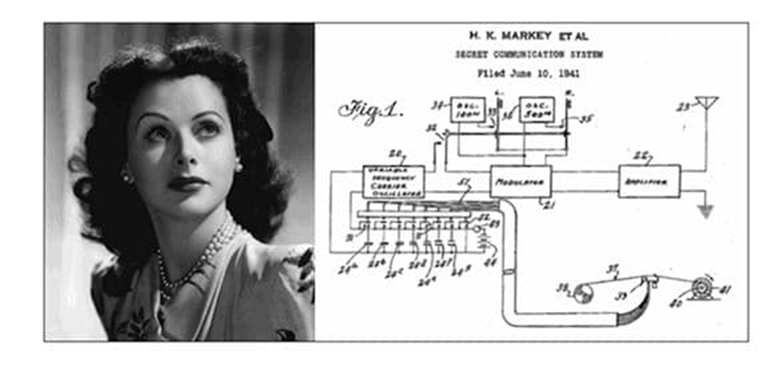

In [18]:
# Function to encode the image to base64
def encode_image(image_path):
    """Encodes an image to a base64 string."""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = "./artifacts/Hedy Lamarr and Frequency Hopping.png"

# Getting the base64 string
base64_image = encode_image(image_path)

# Payload for the API request
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "How are these two images related?"},
            {"type": "image_url", "image_url": {
                "url": f"data:image/jpeg;base64,{base64_image}"
            }},
        ]
    }
]

# Making a request to the OpenAI API
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
)

# Printing the entire response from the API
print(response)
print("\n")

# Extracting and printing the message content from the response
message_content = response.choices[0].message.content
print(message_content)

# Decode the Base64 image data to binary
image_data = base64.b64decode(base64_image)

# Display the image in the notebook
display(Image(data=image_data))


## Multiple Images as Input

ChatCompletion(id='chatcmpl-9nFsIm865MkudSV1qkR5Kn9IaellR', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="The images you've provided feature distinct subjects:\n\n1. **First Image:** Two scuba divers are underwater, with one holding a large underwater camera. The scene likely pertains to underwater photography, possibly showcasing marine life or underwater landscapes.\n\n2. **Second Image:** A marine animal, possibly a manatee or dugong, is swimming underwater. This image emphasizes ocean wildlife.\n\n3. **Third Image:** This features a woman from a classic era alongside a diagram or patent drawing for a secret communication system. The woman is likely a known figure associated with the invention or technology in question.\n\n### Differences:\n- **Subject Matter:** The first two images relate to underwater activities (photography and marine life), while the third revolves around a historical figure and a technical diagram.\n- **Con

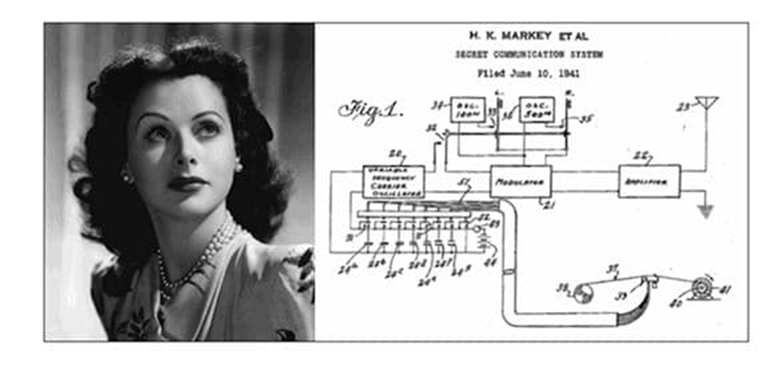

In [19]:
# URLs of the images to be analyzed
image_url1 = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/170207-N-WX059-0049_%2832005262704%29.jpg/537px-170207-N-WX059-0049_%2832005262704%29.jpg"
image_url2 = "https://upload.wikimedia.org/wikipedia/commons/thumb/4/42/Dugong.JPG/640px-Dugong.JPG"

# Function to encode images to base64
def encode_image(image_path):
    """Encodes an image to a base64 string."""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = "./artifacts/Hedy Lamarr and Frequency Hopping.png"

# Getting the base64 string
base64_image = encode_image(image_path)

# Making a request to the OpenAI API to analyze the images
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "What is in these images? Is there any difference between them?",
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": image_url1,
                    },
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": image_url2,
                    },
                },
                {"type": "image_url", "image_url": {
                "url": f"data:image/jpeg;base64,{base64_image}"
            }},
            ],
        }
    ],

)

# Printing the entire response from the API
print(response)
print("\n")

# Extracting and printing the message content from the response
message_content = response.choices[0].message.content
print(message_content)

# Display the images in the notebook
display(Image(url=image_url1))
display(Image(url=image_url2))

# Decode the Base64 image data to binary
image_data = base64.b64decode(base64_image)
display(Image(data=image_data))

## Vision with Assistants

### Event Handler Setup for Streaming

In [ ]:
class EventHandler(AssistantEventHandler):
    """Custom event handler for processing assistant events."""

    def __init__(self):
        super().__init__()
        self.results = []  # Initialize an empty list to store the results

    @override
    def on_text_delta(self, delta, snapshot):
        """Handle the event when there is a text delta (partial text)."""
        # Append the delta value (partial text) to the results list
        self.results.append(delta.value)
        # Call the method to update the Jupyter Notebook cell
        self.update_output()

    def update_output(self):
        """Update the Jupyter Notebook cell with the current markdown content."""
        # Clear the current output in the Jupyter Notebook cell
        clear_output(wait=True)
        # Join all the text fragments stored in results to form the complete markdown content
        markdown_content = "".join(self.results)
        # Display the markdown content in the Jupyter Notebook cell
        display(Markdown(markdown_content))

### Passing in URLs

In [ ]:
# Create an assistant using the client library.
assistant = client.beta.assistants.create(
    model="gpt-4o",  # Specify the model to be used.
    
    instructions=""" 
        You are a helpful assistant.
    """,  # Instructions for the assistant.
    
    temperature=1,  # Set the temperature for response variability.
    top_p=1,  # Set the top_p for nucleus sampling.
)

In [ ]:
# URL of the image to be analyzed
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg"

# Create a new assistant thread with an initial user message
assistant_thread = client.beta.threads.create(
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "What is in this image?",
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": image_url,
                    },
                },
            ],
        },
    ]
)



In [ ]:
# Stream the assistant's response
with client.beta.threads.runs.stream(
    thread_id=assistant_thread.id,  # Specify the thread ID.
    assistant_id=assistant.id,  # Specify the assistant ID.
    instructions="""
    You are a helpful assistant.
    """,  # Provide instructions to the assistant.
    event_handler=EventHandler(),  # Use the custom event handler for processing events.
) as stream:
    stream.until_done()  # Continue streaming until the assistant has finished responding.
    
# Display the images in the notebook
display(Image(url=image_url))

### Passing in a File

In [ ]:
# Path to your image
image_path = "./artifacts/Hedy Lamarr and Frequency Hopping.png"

# Upload the image file to the client for vision-related tasks
image_file = client.files.create(
    file=open(image_path, "rb"),
    purpose="vision"
)



In [ ]:
# Create a new assistant thread with an initial user message
assistant_thread = client.beta.threads.create(
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "How are these two images related?"
                },
                {
                    "type": "image_file",
                    "image_file": {
                        "file_id": image_file.id
                    }
                }
            ]
        }
    ]
)



In [ ]:
# Stream the assistant's response
with client.beta.threads.runs.stream(
    thread_id=assistant_thread.id,  # Specify the thread ID.
    assistant_id=assistant.id,  # Specify the assistant ID.
    instructions="""
    You are a helpful assistant.
    """,  # Provide instructions to the assistant.
    event_handler=EventHandler(),  # Use the custom event handler for processing events.
) as stream:
    stream.until_done()  # Continue streaming until the assistant has finished responding.
    
# Retrieve the file content using the file ID
image_data = client.files.content(image_file.id)

# Create an image object from the binary data
image = PILImage.open(io.BytesIO(image_data.content))

# Display the image
rgb_image = image.convert('RGB')
display(rgb_image)

### Multiple Images as Input

In [ ]:
# URL of the first image to be analyzed
image_url1 = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/170207-N-WX059-0049_%2832005262704%29.jpg/537px-170207-N-WX059-0049_%2832005262704%29.jpg"

# Path to your local image
image_path = "./artifacts/Poker Hand.png"

# Upload the local image file to the client for vision-related tasks
image_file = client.files.create(
    file=open(image_path, "rb"),
    purpose="vision"
)

# Create a new assistant thread with an initial user message
assistant_thread = client.beta.threads.create(
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "What is in these images?"
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": image_url1
                    }
                },
                {
                    "type": "image_file",
                    "image_file": {
                        "file_id": image_file.id
                    }
                }
            ]
        }
    ]
)


In [ ]:
# Stream the assistant's response
with client.beta.threads.runs.stream(
    thread_id=assistant_thread.id,  # Specify the thread ID.
    assistant_id=assistant.id,  # Specify the assistant ID.
    instructions="""
    You are a helpful assistant.
    """,  # Provide instructions to the assistant.
    event_handler=EventHandler(),  # Use the custom event handler for processing events.
) as stream:
    stream.until_done()  # Continue streaming until the assistant has finished responding.
    
# Display the image with the URL
display(Image(url=image_url1))
    
# Display the image uploaded as a file
# Retrieve the file content using the file ID
image_data = client.files.content(image_file.id)

# Create an image object from the binary data
image = PILImage.open(io.BytesIO(image_data.content))

# Display the image
rgb_image = image.convert('RGB')
display(rgb_image)